**Machine Learning practice problems from book Machine Learning with Python Cookbook by Kyle Gallatin and Chris Albon**

## Creting a simulated dataset

In [179]:
from sklearn.datasets import make_regression

# Generate feature matrix, target vector, and the true coefficients
features, target, coeffcients = make_regression(n_samples = 100,
                                                n_features = 3,
                                                n_informative = 3,
                                                n_targets = 1,
                                                noise = 0.0,
                                                coef = True,
                                                random_state =1)
# View feature matrix and target vector
print('Feature Matrix \n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix 
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector
 [-10.37865986  25.5124503   19.67705609]


In [180]:
from sklearn.datasets import make_classification
# Generate features matrix and target vector
features, target = make_classification(n_samples = 100,
                                        n_features = 3,
                                        n_informative = 3,
                                        n_redundant = 0,
                                        n_classes = 2,
                                        weights = [.25, .75],
                                        random_state = 1)
# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])


Feature Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
 [1 0 0]


In make_regression and make_classification, n_informative determines the
number of features that are used to generate the target vector.

If n_informative
is less than the total number of features (n_features), the resulting dataset will have
redundant features that can be identified through feature selection techniques.

In addition, make_classification contains a weights parameter that allows us to
simulate datasets with imbalanced classes. For example, weights = [.25, .75]
would return a dataset with 25% of observations belonging to one class and 75% of
observations belonging to a second class.

For make_blobs, the centers parameter determines the number of clusters generated.

In [181]:
# Dataset designed to work well with clustering techniques
from sklearn.datasets import make_blobs
# Generate features matrix and target vector
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)
# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


In [182]:
"""
Use the pandas library’s read_excel to load an Excel spreadsheet:
# Load library
import pandas as pd
# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx'
# Load data
dataframe = pd.read_excel(url, sheet_name=0, header=0)

# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json'
# Load data
dataframe = pd.read_json(url, orient='columns')

#Loading an Avro file
import requests
import pandavro as pdx
# Create URL
url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.avro'
# Download file
r = requests.get(url)
open('data.avro', 'wb').write(r.content)
# Load data
dataframe = pdx.read_avro('data.avro')

# SQL
# Load libraries
import pandas as pd
from sqlalchemy import create_engine
# Create a connection to the database
database_connection = create_engine('sqlite:///sample.db')
# Load data
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)
# View first two rows
dataframe.head(2)

# Querying a remote SQl database
# Import libraries
import pymysql
import pandas as pd
# Create a DB connection
# Use the following example to start a DB instance
# https://github.com/kylegallatin/mysql-db-example
conn = pymysql.connect(host='localhost',
                      user='root',
                      password = "",
                      db='db',
                      )
# Read the SQL query into a dataframe
dataframe = pd.read_sql("select * from data", conn)
# View the first two rows
dataframe.head(2)

# Loading from an S3 bucket
# S3 path to CSV
s3_uri = "s3://machine-learning-python-cookbook/data.csv"
# Set AWS credentials (replace with your own)
ACCESS_KEY_ID = "xxxxxxxxxxxxx"
SECRET_ACCESS_KEY = "xxxxxxxxxxxxxxxx"
# Read the CSV into a dataframe
dataframe = pd.read_csv(s3_uri,storage_options={
                                                "key": ACCESS_KEY_ID,
                                                "secret": SECRET_ACCESS_KEY,
                                                }
                                                  )
# View first two rows
dataframe.head(2)

# Loading Unstructured data
# Import libraries
import requests
# URL to download the txt file from
txt_url = "https://machine-learning-python-cookbook.s3.amazonaws.com/text.txt"
# Get the txt file
r = requests.get(txt_url)
# Write it to text.txt locally
with open('text.txt', 'wb') as f:
f.write(r.content)
# Read in the file
with open('text.txt', 'r') as f:
text = f.read()
# Print the content
print(text)
Hello there!
"""

'\nUse the pandas library’s read_excel to load an Excel spreadsheet:\n# Load library\nimport pandas as pd\n# Create URL\nurl = \'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx\'\n# Load data\ndataframe = pd.read_excel(url, sheet_name=0, header=0)\n\n# Create URL\nurl = \'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json\'\n# Load data\ndataframe = pd.read_json(url, orient=\'columns\')\n\n#Loading an Avro file\nimport requests\nimport pandavro as pdx\n# Create URL\nurl = \'https://machine-learning-python-cookbook.s3.amazonaws.com/data.avro\'\n# Download file\nr = requests.get(url)\nopen(\'data.avro\', \'wb\').write(r.content)\n# Load data\ndataframe = pdx.read_avro(\'data.avro\')\n\n# SQL\n# Load libraries\nimport pandas as pd\nfrom sqlalchemy import create_engine\n# Create a connection to the database\ndatabase_connection = create_engine(\'sqlite:///sample.db\')\n# Load data\ndataframe = pd.read_sql_query(\'SELECT * FROM data\', database_con

• loc is useful when the index of the DataFrame is a label (e.g., a string).

• iloc works by looking for the position in the DataFrame.

For example, iloc[0]
will return the first row regardless of whether the index is an integer or a label.

In [183]:
import pandas as pd
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/titanic.csv'
# Load data
dataframe = pd.read_csv(url)
# Select first row
dataframe.iloc[0]

,0
Name,"Allen, Miss Elisabeth Walton"
PClass,1st
Age,29.0
Sex,female
Survived,1
SexCode,1


In [184]:
dataframe.iloc[1:4]

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


DataFrames do not need to be numerically indexed. We can set the index of a
DataFrame to any value where the value is unique to each row. For example, we can
set the index to be passenger names and then select rows using a name:

In [185]:
# Set index
dataframe = dataframe.set_index(dataframe['Name'])
# Show row
dataframe.loc['Allen, Miss Elisabeth Walton']

,"Allen, Miss Elisabeth Walton"
Name,"Allen, Miss Elisabeth Walton"
PClass,1st
Age,29.0
Sex,female
Survived,1
SexCode,1


### Selecting Rows Based on Conditionals

In [186]:
# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/titanic.csv'
# Load data
dataframe = pd.read_csv(url)
# Show top two rows where column 'sex' is 'female'
dataframe[dataframe['Sex'] == 'female'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [187]:
# Filter rows
dataframe[(dataframe['Sex'] == 'female') & (dataframe['Age'] >= 65)]

,Name,PClass,Age,Sex,Survived,SexCode
73,"Crosby, Mrs Edward Gifford (Catherine Elizabet...",1st,69.0,female,1,1


### Sorting Values

In [188]:
dataframe.sort_values(by=["Age"]).head(2)

,Name,PClass,Age,Sex,Survived,SexCode
763,"Dean, Miss Elizabeth Gladys (Millvena)",3rd,0.17,female,1,1
751,"Danbom, Master Gilbert Sigvard Emanuel",3rd,0.33,male,0,0


In [189]:
# Replacing values
dataframe['Sex'].replace("female", "woman").head(2)

,Sex
0,woman
1,woman


In [190]:
# Replace "female" and "male" with "Woman" and "Man"
dataframe['Sex'].replace(["female", "male"], ["Woman", "Man"]).head(5)

,Sex
0,Woman
1,Woman
2,Man
3,Woman
4,Man


In [191]:
# Replace values, show two rows
dataframe.replace(1, "One").head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,One,One
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,One


In [192]:
# Replace also accepts regular expressions:
# Replace values, show two rows
dataframe.replace(r"1st", "First", regex=True).head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",First,29.0,female,1,1
1,"Allison, Miss Helen Loraine",First,2.0,female,0,1


In [193]:
# Rename column
dataframe.rename(columns={'PClass': 'Passenger Class', 'Sex': 'Gender'}).head(2)

,Name,Passenger Class,Age,Gender,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [194]:
# Calculate statistics
print('Maximum:', dataframe['Age'].max())
print('Minimum:', dataframe['Age'].min())
print('Mean:', dataframe['Age'].mean())
print('Sum:', dataframe['Age'].sum())
print('Count:', dataframe['Age'].count())

Maximum: 71.0
Minimum: 0.17
Mean: 30.397989417989418
Sum: 22980.88
Count: 756


In [195]:
# Select unique values
dataframe['Sex'].unique()

array(['female', 'male'], dtype=object)

In [196]:
# Show counts
dataframe['Sex'].value_counts()

,count
Sex,
male,851
female,462


In [197]:
# Show counts
dataframe['PClass'].value_counts()
# While almost all passengers belong to one of three classes as expected, a single
# passenger has the class *.

,count
PClass,
3rd,711
1st,322
2nd,279
*,1


In [198]:
# Show number of unique values
dataframe['PClass'].nunique()

4

### Handling mssing values

In [199]:
## Select missing values, show two rows
dataframe[dataframe['Age'].isnull()].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1
13,"Barkworth, Mr Algernon H",1st,NaN,male,1,0


In [200]:
# Get a single null row
null_entry = dataframe[dataframe["Age"].isna()].head(1)
null_entry

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1


In [201]:
# Deleting columns
dataframe.drop(['Age', 'Sex'], axis=1).head(2)
"""
# Drop column with no names

dataframe.drop(dataframe.columns[1], axis=1).head(2)
avoid using the pandas inplace=True argument

# Delete rows, show first three rows of output
dataframe[dataframe['Sex'] != 'male'].head(3)

# Delete row, show first two rows of output
dataframe[dataframe.index != 0].head(2)
"""


"\n# Drop column with no names\n\ndataframe.drop(dataframe.columns[1], axis=1).head(2)\navoid using the pandas inplace=True argument\n\n# Delete rows, show first three rows of output\ndataframe[dataframe['Sex'] != 'male'].head(3)\n\n# Delete row, show first two rows of output\ndataframe[dataframe.index != 0].head(2)\n"

In [202]:
# Drop duplicates, show first two rows of output
dataframe.drop_duplicates().head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [203]:
# Show number of rows
print("Number Of Rows In The Original DataFrame:", len(dataframe))
print("Number Of Rows After Deduping:", len(dataframe.drop_duplicates()))
"""
This is because drop_duplicates defaults to dropping only rows that match perfectly
across all columns.
"""

Number Of Rows In The Original DataFrame: 1313
Number Of Rows After Deduping: 1313


'\nThis is because drop_duplicates defaults to dropping only rows that match perfectly\nacross all columns.\n'

In [204]:
"""
Because every row in our DataFrame is unique, none will be
dropped. However, often we want to consider only a subset of columns to check for
duplicate rows. We can accomplish this using the subset parameter:
"""
# Drop duplicates
dataframe.drop_duplicates(subset=['Sex'])


,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [205]:
"""
The answer is that drop_duplicates defaults to keeping the first occurrence of
a duplicated row and dropping the rest. We can control this behavior using the keep
parameter:
"""
# Drop duplicates
dataframe.drop_duplicates(subset=['Sex'], keep='last')

,Name,PClass,Age,Sex,Survived,SexCode
1307,"Zabour, Miss Tamini",3rd,NaN,female,0,1
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


In [206]:
"""A related method is duplicated, which returns a boolean series denoting whether
a row is a duplicate or not. This is a good option if you don’t want to simply drop
duplicates:
"""
dataframe.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1308,False
1309,False
1310,False
1311,False


### Grouping

In [207]:
# Group rows by the values of the column 'Sex', calculate mean # of each group
dataframe.groupby('Sex').mean(numeric_only=True)

,Age,Survived,SexCode
Sex,,,
female,29.396424,0.666667,1.0
male,31.014338,0.166863,0.0


In [208]:
"""
Why didn’t it return something more useful? The reason is that groupby needs to be
paired with some operation that we want to apply to each group, such as calculating
an aggregate statistic (e.g., mean, median, sum). When talking about grouping we
often use shorthand and say “group by gender,” but that is incomplete. For grouping
to be useful, we need to group by something and then apply a function to each of
those groups
"""
# Group rows
dataframe.groupby('Sex')

In [209]:
# Group rows, count rows
dataframe.groupby('Survived')['Name'].count()

,Name
Survived,
0,863
1,450


In [210]:
# Ensure necessary imports
import numpy as np
import pandas as pd

# --- Data Generation (from previous steps) ---
# Create date range: 100,000 timestamps, 30 seconds apart, starting 2017-06-06
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')

# Create DataFrame with the date range as index
dataframe = pd.DataFrame(index=time_index)

# Create a column of random values (simulating sales amount)
dataframe['Sale_Amount'] = np.random.randint(1, 10, 100000)

print("DataFrame created with time index and random sales data.")
print("First 3 rows of raw data:")
print(dataframe.head(3))
# --- End Data Generation ---


# --- Resample by Month, Count Rows, using label='left' ---

# dataframe.resample('M'): Groups the data by monthly frequency ('M').
# , label='left': This is the key parameter here.
#    - By default, resample uses the 'right' edge (end date) of the time bin as the index label.
#    - Setting label='left' changes this so the index label for each month is the *start date* of that month's bin.
# .count(): Aggregates the groups by counting the number of non-null entries in each column within each month.
# In this case, it counts the number of sales (rows) per month.
dataframe.resample('M', label='left').count()

# The result is a new DataFrame indexed by the *start* date of each month covered by the data,
# with the count of 'Sale_Amount' records for that month.



DataFrame created with time index and random sales data.
First 3 rows of raw data:
                     Sale_Amount
2017-06-06 00:00:00            4
2017-06-06 00:00:30            9
2017-06-06 00:01:00            1


<ipython-input-210-750187dfafeb>:7: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')
<ipython-input-210-750187dfafeb>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dataframe.resample('M', label='left').count()


,Sale_Amount
2017-05-31,72000
2017-06-30,28000


In Pandas, the .resample() method is a powerful tool used for changing the frequency of time series data. You can use it to:

**Downsample**: Aggregate data from a higher frequency to a lower frequency (e.g., go from data recorded every minute to data summed up hourly or daily).

**Upsample**: Increase the frequency of the data (e.g., go from monthly data to daily data). This often involves filling in missing values rather than aggregating.

**Key Requirements**:

The DataFrame or Series you call .resample() on must have a DatetimeIndex.
The Two-Step Process:

When you use .resample(), it typically involves two steps:

**Grouping ( .resample(frequency) )**: This step is the .resample() call itself. You specify the frequency you want to group by (e.g., 'D' for daily, 'W' for weekly, 'M' for monthly, 'H' for hourly, '15T' for 15 minutes, '30S' for 30 seconds, etc.). Pandas then effectively groups the rows based on these time bins.

At this stage, resample() returns a DatetimeIndexResampler object. It's like a "grouped" object, but no calculation has been performed yet.
You can control how these bins are defined (e.g., where they start using origin, how the bin label is determined using label, etc., as we discussed with label='left').

**Aggregation or Interpolation**: After grouping, you need to specify how to combine the data within each bin (for downsampling) or how to fill in data points in the new, higher frequency bins (for upsampling).

**For Downsampling**: You follow .resample() with an aggregation function like .sum(), .mean(), .count(), .min(), .max(), .std(), .first(), .last(), etc. This collapses the data within each time bin into a single value.
For Upsampling: You follow .resample() with a filling method like .ffill() (forward fill), .bfill() (backward fill), or .interpolate() to populate the new, higher frequency time points that didn't exist in the original data.

### Aggregate Operations and Statistics

In [211]:
# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/titanic.csv'
# Load data
dataframe = pd.read_csv(url)
# Get the minimum of every column
dataframe.agg("min")

,0
Name,"Abbing, Mr Anthony"
PClass,*
Age,0.17
Sex,female
Survived,0
SexCode,0


In [212]:
# Mean Age, min and max SexCode
dataframe.agg({"Age":["mean"], "SexCode":["min", "max"]})

,Age,SexCode
mean,30.397989,NaN
min,NaN,0.0
max,NaN,1.0


In [213]:
"""
By grouping the data and applying aggregate statistics, you can view
patterns in the data that may prove useful during the machine learning or feature
engineering process. While visual charts are also helpful, it’s often useful to have such
specific, descriptive statistics as a reference to better understand the data.
"""
# Number of people who survived and didn't survive in each class
dataframe.groupby(["PClass","Survived"]).agg({"Survived":["count"]}).reset_index()

PClass Survived      
                  count
0      *        0     1
1    1st        0   129
2    1st        1   193
3    2nd        0   160
4    2nd        1   119
5    3rd        0   573
6    3rd        1   138

In [214]:
# Looping over a column
for name in dataframe['Name'][0:2]:
  print(name.upper())

ALLEN, MISS ELISABETH WALTON
ALLISON, MISS HELEN LORAINE


In [215]:
# Show first two names uppercased
[name.upper() for name in dataframe['Name'][0:2]]

['ALLEN, MISS ELISABETH WALTON', 'ALLISON, MISS HELEN LORAINE']

In [216]:
# Applying a function over all elements in a column

def uppercase(x):
  return x.upper()

# Apply function, show two rows
dataframe['Name'].apply(uppercase)[0:2]

,Name
0,"ALLEN, MISS ELISABETH WALTON"
1,"ALLISON, MISS HELEN LORAINE"


In [217]:
# Apply a function to groups

dataframe.groupby('Sex').apply(lambda x: x.count())

<ipython-input-217-65a9a84aa2a6>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataframe.groupby('Sex').apply(lambda x: x.count())


,Name,PClass,Age,Sex,Survived,SexCode
Sex,,,,,,
female,462,462,288,462,462,462
male,851,851,468,851,851,851


In [218]:
# Concatenating DataFrames
# Create DataFrame
data_a = {'id': ['1', '2', '3'],
'first': ['Alex', 'Amy', 'Allen'],
'last': ['Anderson', 'Ackerman', 'Ali']}
dataframe_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last'])
# Create DataFrame
data_b = {'id': ['4', '5', '6'],
'first': ['Billy', 'Brian', 'Bran'],
'last': ['Bonder', 'Black', 'Balwner']}
dataframe_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last'])

pd.concat([dataframe_a, dataframe_b], axis=0)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner


In [219]:
# Concatenate DataFrames by columns
pd.concat([dataframe_a, dataframe_b], axis=1)

,id,first,last,id,first,last
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner


In [220]:
# Merging Data frames - merge defaults to inner joins

# Create DataFrame
employee_data = {'employee_id': ['1', '2', '3', '4'],
'name': ['Amy Jones', 'Allen Keys', 'Alice Bees',
'Tim Horton']}
dataframe_employees = pd.DataFrame(employee_data, columns = ['employee_id',
'name'])
# Create DataFrame
sales_data = {'employee_id': ['3', '4', '5', '6'],
'total_sales': [23456, 2512, 2345, 1455]}
dataframe_sales = pd.DataFrame(sales_data, columns = ['employee_id',
'total_sales'])
# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


In [221]:
# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='outer')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0
4,5,NaN,2345.0
5,6,NaN,1455.0


In [222]:
# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='left')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0


In [223]:
#We can also specify the column name in each DataFrame to merge on:
# Merge DataFrames
pd.merge(dataframe_employees,
dataframe_sales,
left_on='employee_id',
right_on='employee_id')

"""
If, instead of merging on two columns, we want to merge on the indexes of
each DataFrame, we can replace the left_on and right_on parameters with
left_index=True and right_index=True.
"""

'\nIf, instead of merging on two columns, we want to merge on the indexes of\neach DataFrame, we can replace the left_on and right_on parameters with\nleft_index=True and right_index=True.\n'

## **Handling Numerical Data - Scikit Learn**

**Rescaling**

In [224]:
from sklearn import preprocessing

# Create feature
feature = np.array([[-500.5],
[-100.1],
[0],
[100.1],
[900.9]])

# Create Scaler Object
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

# Scale feature
scaled_feature = minmax_scale.fit_transform(feature)

# Show feature
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

**Standardizing**

In [225]:
# Standardizing - mean of 0 and standard deviation of 1

# Create feature
x = np.array([[-1000.1],
[-200.2],
[500.5],
[600.6],
[9000.9]])

scaler = preprocessing.StandardScaler()

standardized = scaler.fit_transform(x)

standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

In [226]:
# Print mean and standard deviation
print("Mean:", round(standardized.mean()))
print("Standard deviation:", standardized.std())

Mean: 0
Standard deviation: 1.0


**Robust_scaler**

In [227]:
"""
If our data has significant outliers, it can negatively impact our standardization by
affecting the feature’s mean and variance. In this scenario, it is often helpful to instead
rescale the feature using the median and quartile range. In scikit-learn, we do this
using the RobustScaler method:
"""
# Create scaler - uses Median and quartile range
robust_scaler = preprocessing.RobustScaler()

# Transform feature
robust_scaler.fit_transform(x)


array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

**Normalizing**

In [228]:
from sklearn.preprocessing import Normalizer

# Create feature matrix
features = np.array([[0.5, 0.5],
                    [1.1, 3.4],
                    [1.5, 20.2],
                    [1.63, 34.4],
                    [10.9, 3.3]])

normalizer = Normalizer(norm="l2") # we are using l2 norm (Euclidean norm - squared features)
# L2 norm can be thought of as the distance between two points in NewYork for a bird (i.e., a straight line)
normalizer.transform(features)

"""
# Transform feature matrix can also be done this way
>>>features_l2_norm = Normalizer(norm="l2").transform(features)
# Show feature matrix
>>features_l2_norm
"""

'\n# Transform feature matrix can also be done this way\n>>>features_l2_norm = Normalizer(norm="l2").transform(features)\n# Show feature matrix\n>>features_l2_norm\n'

In [229]:
# Transform feature matrix
# while L1 can be thought of as the distance for a human walking on the street
#(walk north one block, east one block, north one block,east one block, etc.),
#which is why it is called “Manhattan norm” or “Taxicab norm

features_l1_norm = Normalizer(norm="l1").transform(features) # Manhattan Norm (absolute values)
# Show feature matrix
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [230]:
"""
Practically, notice that norm="l1" rescales an observation’s values so they sum to 1,
which can sometimes be a desirable quality:
"""

# Print sum
print("Sum of the first observation\'s values:",features_l1_norm[0, 0] + features_l1_norm[0, 1])


Sum of the first observation's values: 1.0


## Generating Polynomial and Interaction Features

In [231]:
from sklearn.preprocessing import PolynomialFeatures

# Create feature matrix
features = np.array([[2, 3],
                    [2, 3],
                    [2, 3]])

# Create PolynomialFeatures object
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)
# Create polynomial features
polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

In [232]:
# We can restrict the features created to only interaction features by setting
#interaction_only to True: interaction features x1x2
interaction = PolynomialFeatures(degree=2,
interaction_only=True, include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

## **Transforming Features**

In [233]:
from sklearn.preprocessing import FunctionTransformer
# Create feature matrix
features = np.array([[2, 3],
                    [2, 3],
                    [2, 3]])

# Define a simple function
def add_ten(x: int) -> int:
  return x + 10
# Create transformer
ten_transformer = FunctionTransformer(add_ten)
# Transform feature matrix
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

In [234]:
# Create DataFrame
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])
# Apply function
df.apply(add_ten)

,feature_1,feature_2
0,12,13
1,12,13
2,12,13


## Detecting Outliers

Detecting outliers is unfortunately more of an art than a science. However, a common
method is to assume the data is normally distributed and, based on that assumption,
“draw” an ellipse around the data, classifying any observation inside the ellipse as
an inlier (labeled as 1) and any observation outside the ellipse as an outlier (labeled
as -1):

**One additional point**: if you do have outliers, standardization might not be appropriate
because the mean and variance might be highly influenced by the outliers. In this
case, use a rescaling method more robust against outliers, like **RobustScaler**.

In [235]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# Create simulated data
features, _ = make_blobs(n_samples = 10,
                         n_features= 2,
                         centers = 1,
                         random_state = 1)

# Replace the first observation's values with extreme values
features[0,0] = 10000
features[0,1] = 10000

# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)
# Fit detector
outlier_detector.fit(features)
# Predict outliers
outlier_detector.predict(features)
# In these arrays, values of -1 refer to outliers whereas values of 1 refer to inliers
"""
Think of contamination as our estimate of the cleanliness of our data. If we
expect our data to have few outliers, we can set contamination to something small.
However, if we believe that the data is likely to have outliers, we can set it to a higher
value.
"""

'\nThink of contamination as our estimate of the cleanliness of our data. If we\nexpect our data to have few outliers, we can set contamination to something small.\nHowever, if we believe that the data is likely to have outliers, we can set it to a higher\nvalue.\n'

In [236]:
"""Instead of looking at observations as a whole, we can instead look at individual
features and identify extreme values in those features using interquartile range (IQR):
"""
# Create one feature
feature = features[:,0]
# Create a function to return index of outliers
def indicies_of_outliers(x: int) -> np.array(int):
  # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the input array 'x'
  q1, q3 = np.percentile(x, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  return np.where((x > upper_bound) | (x < lower_bound))
# Run function
indicies_of_outliers(feature)

"""
In its simplest form, when given a boolean array as its only argument,
np.where(boolean_array) returns the indices where the boolean array is True.
"""

'\nIn its simplest form, when given a boolean array as its only argument, \nnp.where(boolean_array) returns the indices where the boolean array is True.\n'

In [237]:
# Handling Outliers
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]
# Filter observations
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [238]:
# Create feature based on boolean condition
# np.where() is : condition, value_if_true, value_if_false.
houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)
# Show data
houses


,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [239]:
# Log feature to dampen the effect of the outlier
houses["Log_Of_Square_Feet"] = [np.log(x) for x in houses["Square_Feet"]]
# Show data
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


## Breaking Numerical features into discrete bins

In [240]:
from sklearn.preprocessing import Binarizer
# Create feature
age = np.array([[6],
[12],
[20],
[36],
[65]])
# Create binarizer
binarizer = Binarizer(threshold=18)
# Transform feature
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [241]:
# we can break up numerical features according to multiple thresholds
np.digitize(age, bins=[20,30,64])


array([[0],
       [0],
       [1],
       [2],
       [3]])

In [242]:
"""
Note that the arguments for the bins parameter denote the left edge of each bin. For
example, the 20 argument does not include the element with the value of 20, only
the two values smaller than 20. We can switch this behavior by setting the parameter
right to True:
"""
# Bin feature
np.digitize(age, bins=[20,30,64], right=True)

array([[0],
       [0],
       [0],
       [2],
       [3]])

## Grouping Observations Using Clustering

In [243]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Make simulated feature matrix
# The true labels for each sample (which blob it came from) - assigned to '_',
#indicating we don't need them for this example.
features, _ = make_blobs(n_samples = 50,
                        n_features = 2,
                        centers = 3,
                        random_state = 1)
# 'features' is now a NumPy array like [[x1, y1], [x2, y2], ..., [x50, y50]].
# Create DataFrame
# columns=["feature_1", "feature_2"]: Assign names to the two feature columns.
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])
# Make k-means clusterer - We are telling KMeans to look for 3 clusters (K=3).
clusterer = KMeans(3, random_state=0)
# Fit clusterer
clusterer.fit(features)
# Predict values
dataframe["group"] = clusterer.predict(features)
# It returns a NumPy array containing
# the index (0, 1, or 2) of the closest cluster for each data point.
# View first few observations
dataframe.head(10)

,feature_1,feature_2,group
0,-9.877554,-3.336145,2
1,-7.287210,-8.353986,0
2,-6.943061,-7.023744,0
3,-7.440167,-8.791959,0
4,-6.641388,-8.075888,0
5,-0.794152,2.104951,1
6,-2.760179,5.551214,1
7,-9.946905,-4.590344,2
8,-0.525790,3.306599,1
9,-1.981977,4.022436,1


## Deleting observations with missing values

In [244]:
# Create feature matrix
features = np.array([[1.1, 11.1],
[2.2, 22.2],
[3.3, 33.3],
[4.4, 44.4],
[np.nan, 55]])
# Keep only observations that are not (denoted by ~) missing
features[~np.isnan(features).any(axis=1)]
"""
# Load data
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])
# Remove observations with missing values
dataframe.dropna()
"""

'\n# Load data\ndataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])\n# Remove observations with missing values\ndataframe.dropna()\n'

## Imputing missing values

In [245]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
# Make a simulated feature matrix
features, _ = make_blobs(n_samples = 1000,
n_features = 2,
random_state = 1)
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Replace the first feature's first value with a missing value
# We are deliberately creating a missing value to demonstrate imputation.
true_value = standardized_features[0,0] # Store the original value for comparison later.
standardized_features[0,0] = np.nan

# Predict the missing values in the feature matrix
knn_imputer = KNNImputer(n_neighbors=5)
features_knn_imputed = knn_imputer.fit_transform(standardized_features)

# Compare true and imputed values
print("True Value:", true_value)
print("Imputed Value:", features_knn_imputed[0,0])

True Value: 0.8730186113995938
Imputed Value: 1.0959262913919632


In [246]:
"""
Alternatively, we can use scikit-learn’s SimpleImputer class from the imputer module
to fill in missing values with the feature’s mean, median, or most frequent value.
However, we will typically get worse results than with KNN
"""
from sklearn.impute import SimpleImputer
# Make a simulated feature matrix
features, _ = make_blobs(n_samples = 1000,
                        n_features = 2,
                        random_state = 1)

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Replace the first feature's first value with a missing value
# We are deliberately creating a missing value to demonstrate imputation.
# standardized_features[0,0]: Selects the value at the first row (index 0) and first column (index 0) of the scaled data.
true_value = standardized_features[0,0] # Store the original value for comparison later.
standardized_features[0,0] = np.nan  # Replace the value with np.nan

# Create imputer using the "mean" strategy
mean_imputer = SimpleImputer(strategy="mean")

# Impute values
features_mean_imputed = mean_imputer.fit_transform(features)

# Compare true and imputed values
print("True Value:", true_value)
print("Imputed Value:", features_mean_imputed[0,0])

True Value: 0.8730186113995938
Imputed Value: -3.058372724614996


## Handling Categorical Data

In [247]:
# Encoding nominal categorical features
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
# Create feature
feature = np.array([["Texas"],
                    ["California"],
                    ["Texas"],
                    ["Delaware"],
                    ["Texas"]])
# Create one-hot encoder
one_hot = LabelBinarizer()
# One-hot encode feature
one_hot.fit_transform(feature)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [248]:
# View feature classes
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [249]:
#If we want to reverse the one-hot encoding, we can use inverse_transform:
one_hot.inverse_transform(one_hot.transform(feature))

array(['Texas', 'California', 'Texas', 'Delaware', 'Texas'], dtype='<U10')

In [250]:
# Using Pandas for one-hot encoding
# Create dummy variables from feature
pd.get_dummies(feature[:,0])
# pd.get_dummies(df, columns=['Color']) takes the df DataFrame and targets the 'Color' column.

,California,Delaware,Texas
0,False,False,True
1,True,False,False
2,False,False,True
3,False,True,False
4,False,False,True


In [251]:
# Create multiclass feature
multiclass_feature = [("Texas", "Florida"),
("California", "Alabama"),
("Texas", "Florida"),
("Delaware", "Florida"),
("Texas", "Alabama")]
# Create multiclass one-hot encoder
one_hot_multiclass = MultiLabelBinarizer()
# One-hot encode multiclass feature
one_hot_multiclass.fit_transform(multiclass_feature)


array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

## Encoding Ordinal Categorical Features

In [252]:
dataframe = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High"]})
# Create mapper
scale_mapper = {"Low":1,
"Medium":2,
"High":3}
# Replace feature values with scale
dataframe["Score"].replace(scale_mapper)

<ipython-input-252-82a3de80094c>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe["Score"].replace(scale_mapper)


,Score
0,1
1,1
2,2
3,2
4,3


In [253]:
dataframe = pd.DataFrame({"Score": ["Low","Low","Medium","Medium","High","Barely More Than Medium"]})
scale_mapper = {"Low":1,"Medium":2,"Barely More Than Medium":3,"High":4}
# Replace feature values with scale
dataframe["Score"].replace(scale_mapper)

<ipython-input-253-f14577f7988e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe["Score"].replace(scale_mapper)


,Score
0,1
1,1
2,2
3,2
4,4
5,3


## Encoding Dictionaries of Features

In [254]:
from sklearn.feature_extraction import DictVectorizer
# Create dictionary
data_dict = [{"Red": 2, "Blue": 4},
              {"Red": 4, "Blue": 3},
              {"Red": 1, "Yellow": 2},
              {"Red": 2, "Yellow": 2}]
# Create dictionary vectorizer
dictvectorizer = DictVectorizer(sparse=False)
# Convert dictionary to feature matrix
features = dictvectorizer.fit_transform(data_dict)
# View feature matrix
features
"""
By default DictVectorizer outputs a sparse matrix that only stores elements with
a value other than 0. This can be very helpful when we have massive matrices
(often encountered in natural language processing) and want to minimize the memory
requirements.
"""

'\nBy default DictVectorizer outputs a sparse matrix that only stores elements with\na value other than 0. This can be very helpful when we have massive matrices\n(often encountered in natural language processing) and want to minimize the memory\nrequirements.\n'

In [255]:
# Get feature names
feature_names = dictvectorizer.get_feature_names_out()
feature_names

array(['Blue', 'Red', 'Yellow'], dtype=object)

In [256]:
# Use pandas to view output better
# Create dataframe from features
pd.DataFrame(features, columns=feature_names)

,Blue,Red,Yellow
0,4.0,2.0,0.0
1,3.0,4.0,0.0
2,0.0,1.0,2.0
3,0.0,2.0,2.0


In [257]:
# Create word count dictionaries for four documents
doc_1_word_count = {"Red": 2, "Blue": 4}
doc_2_word_count = {"Red": 4, "Blue": 3}
doc_3_word_count = {"Red": 1, "Yellow": 2}
doc_4_word_count = {"Red": 2, "Yellow": 2}
# Create list
doc_word_counts = [doc_1_word_count,
doc_2_word_count,
doc_3_word_count,
doc_4_word_count]
# Convert list of word count dictionaries into feature matrix
dictvectorizer.fit_transform(doc_word_counts)


array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

## Imputing missing class values

In [258]:

"""
The ideal solution is to train a machine learning classifier algorithm to predict the
missing values, commonly a k-nearest neighbors (KNN) classifier:
"""
from sklearn.neighbors import KNeighborsClassifier
# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45],
[1, 1.18, 1.33],
[0, 1.22, 1.27],
[1, -0.21, -1.19]])
# Create feature matrix with missing values in the categorical feature
X_with_nan = np.array([[np.nan, 0.87, 1.31],
                      [np.nan, -0.67, -0.22]])

# Train KNN learner
clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])
# Predict class of missing values
imputed_values = trained_model.predict(X_with_nan[:,1:])
# Join column of predicted class with their other features
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))
# Join two feature matrices
np.vstack((X_with_imputed, X))

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

In [259]:
"""
An alternative solution is to fill in missing values with the feature’s most frequent
value:
"""
from sklearn.impute import SimpleImputer
# Join the two feature matrices
X_complete = np.vstack((X_with_nan, X))
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X_complete)

array([[ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

## Handling Imbalanced Classes

In [260]:
"""
To demonstrate our solutions, we need to create some data with imbalanced classes.
Fisher’s Iris dataset contains three balanced classes of 50 observations, each indicating
the species of flower (Iris setosa, Iris virginica, and Iris versicolor). To unbalance the
dataset, we remove 40 of the 50 Iris setosa observations and then merge the Iris virginica and Iris versicolor classes. The end result is a binary target vector indicating
if an observation is an Iris setosa flower or not. The result is 10 observations of Iris
setosa (class 0) and 100 observations of not Iris setosa (class 1):
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
# Load iris data
iris = load_iris()
# Create feature matrix
features = iris.data
# Create target vector
target = iris.target
# Remove first 40 observations
features = features[40:,:]
target = target[40:]

# Create binary target vector indicating if class 0
target = np.where((target == 0), 0, 1)

# Look at the imbalanced target vector
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [261]:
"""
Many algorithms in scikit-learn offer a parameter to weight classes during training
to counteract the effect of their imbalance. While we have not covered it yet, Random
ForestClassifier is a popular classification algorithm and includes a class_weight
parameter
"""
# Create weights
weights = {0: 0.9, 1: 0.1}

# Create random forest classifier with weights
RandomForestClassifier(class_weight=weights)

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1})

In [262]:
# Train a random forest with balanced class weights
RandomForestClassifier(class_weight="balanced")

RandomForestClassifier(class_weight='balanced')

In [263]:
"""
Alternatively, we can downsample the majority class or upsample the minority class.
In downsampling, we randomly sample without replacement from the majority class
(i.e., the class with more observations) to create a new subset of observations equal
in size to the minority class. For example, if the minority class has 10 observations,
we will randomly select 10 observations from the majority class and use those 20
observations as our data. Here we do exactly that using our unbalanced iris data:

[0] Extracts the Usable Array: By adding [0], you unpack the tuple and
get the NumPy array of indices itself:
np.where(target == 0)[0] gives you the actual array array([indices_of_zeros]).
"""
# Indicies of each class's observations
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]
# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)
# For every observation of class 0, randomly sample
# from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)
# Join together class 0's target vector with the
# downsampled class 1's target vector
np.hstack((target[i_class0], target[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [264]:
# Join together class 0's feature matrix with the
# downsampled class 1's feature matrix
np.vstack((features[i_class0,:], features[i_class1_downsampled,:]))[0:5]

array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

In [265]:
"""
Our other option is to upsample the minority class. In upsampling, for every observation
in the majority class, we randomly select an observation from the minority class
with replacement. The result is the same number of observations from the minority
and majority classes. Upsampling is implemented very similarly to downsampling,
just in reverse:

i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True):
This is the upsampling step. np.random.choice is used to randomly pick n_class1
(which is 100) indices from the i_class0 indices (which represent
the 10 class 0 samples). replace=True is essential here – it means you can pick
the same sample multiple times, which is how you duplicate them.

The subsequent np.concatenate and np.vstack lines combine the target/features
of the 100 resampled (duplicated) class 0 samples with the target/features of
all 100 class 1 samples. The result is a balanced dataset with 100
class 0 samples and 100 class 1 samples.
"""
# For every observation in class 1, randomly sample from class 0 with
# replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)
# Join together class 0's upsampled target vector with class 1's target vector
np.concatenate((target[i_class0_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [266]:
# Join together class 0's upsampled feature matrix with class 1's feature matrix
np.vstack((features[i_class0_upsampled,:], features[i_class1,:]))[0:5]

array([[5. , 3.5, 1.6, 0.6],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.4, 3.2, 1.3, 0.2],
       [5.3, 3.7, 1.5, 0.2]])

## **Handling Text**

In [267]:
# You have some unstructured text data and want to complete some basic cleaning

# Create text
text_data = [" Interrobang. By Aishwarya Henriette ",
"Parking And Going. By Karl Gautier", " Today Is The night. By Jarek Prakash "]

# Strip whitespaces
strip_whitespace = [string.strip() for string in text_data]

# Show text
strip_whitespace

['Interrobang. By Aishwarya Henriette',
 'Parking And Going. By Karl Gautier',
 'Today Is The night. By Jarek Prakash']

In [269]:
# Remove periods
remove_periods = [string.replace(".", "") for string in strip_whitespace]
# Show text
remove_periods

['Interrobang By Aishwarya Henriette',
 'Parking And Going By Karl Gautier',
 'Today Is The night By Jarek Prakash']

In [271]:
def capitalizer(string: str) -> str:
  return string.upper()
# Apply function
[capitalizer(string) for string in remove_periods]

['INTERROBANG BY AISHWARYA HENRIETTE',
 'PARKING AND GOING BY KARL GAUTIER',
 'TODAY IS THE NIGHT BY JAREK PRAKASH']

In [273]:
import re
# Create function
def replace_letters_with_X(string: str) -> str:
  return re.sub(r"[a-zA-Z]", "X", string)
# Apply function
[replace_letters_with_X(string) for string in remove_periods]

['XXXXXXXXXXX XX XXXXXXXXX XXXXXXXXX',
 'XXXXXXX XXX XXXXX XX XXXX XXXXXXX',
 'XXXXX XX XXX XXXXX XX XXXXX XXXXXXX']

In [274]:
# Define a string
s = "machine learning in python cookbook"
# Find the first index of the letter "n"
find_n = s.find("n")
# Whether or not the string starts with "m"
starts_with_m = s.startswith("m")
# Whether or not the string ends with "python"
ends_with_python = s.endswith("python")
# Is the string alphanumeric
is_alnum = s.isalnum()
# Is it composed of only alphabetical characters (not including spaces)
is_alpha = s.isalpha()
# Encode as utf-8
encode_as_utf8 = s.encode("utf-8")
# Decode the same utf-8
decode = encode_as_utf8.decode("utf-8")
print(
find_n,
starts_with_m,
ends_with_python,
is_alnum,
is_alpha,
encode_as_utf8,
decode,
sep = "|"
)

5|True|False|False|False|b'machine learning in python cookbook'|machine learning in python cookbook


In [275]:
# Parsing and cleaing HTML

from bs4 import BeautifulSoup
# Create some HTML code
html = "<div class='full_name'>"\
"<span style='font-weight:bold'>Masego"\
"</span> Azra</div>"
# Parse html
soup = BeautifulSoup(html, "lxml")
# Find the div with the class "full_name", show text
soup.find("div", { "class" : "full_name" }).text

'Masego Azra'

In [276]:
# Load libraries
import unicodedata
import sys
# Create text
text_data = ['Hi!!!! I. Love. This. Song....',
'10000% Agree!!!! #LoveIT',
'Right?!?!']
# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(
(i for i in range(sys.maxunicode)
if unicodedata.category(chr(i)).startswith('P')), None)
# For each string, remove any punctuation characters
[string.translate(punctuation) for string in text_data]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

In [280]:
# Load library
import nltk
from nltk.tokenize import word_tokenize

In [282]:
# Create text
string = "The science of today is the technology of tomorrow"
# Tokenize words
word_tokenize(string)

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

In [283]:
from nltk.tokenize import sent_tokenize
# Create text
string = "The science of today is the technology of tomorrow. Tomorrow is today."
# Tokenize sentences
sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Tomorrow is today.']

In [286]:
# Removing Stop words
import nltk
from nltk.corpus import stopwords
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')


# Create word tokens
tokenized_words = ['i',
'am',
'going',
'to',
'go',
'to',
'the',
'store',
'and',
'park']
# Load stop words
stop_words = stopwords.words('english')
# Remove stop words
[word for word in tokenized_words if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['going', 'go', 'store', 'park']

In [287]:
# Stemming words
from nltk.stem.porter import PorterStemmer
# Create word tokens
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']
# Create stemmer
porter = PorterStemmer()
# Apply stemmer
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']

In [291]:
# Taging parts of speech
# NNP: Propernoun, singular; NN :Noun Singular; RB: Adverb; JJ:Adjective; PRP: Personal pronoun
# VDB: Verb past tense; VGB: Verb Gerund or Present participle
import nltk
from nltk import pos_tag
from nltk import word_tokenize

try: # Add a try-except block to handle the LookupError and download the resource if needed
    # Attempt to use pos_tag to trigger the check for the resource
    # The resource 'averaged_perceptron_tagger' is a collection that includes the English tagger
    # However, explicitly downloading 'averaged_perceptron_tagger_eng' is more precise
    pos_tag(word_tokenize("test"))
except LookupError:
    # Download the required tagger resource specifically for English
    nltk.download('averaged_perceptron_tagger_eng')

text_data = "Chris loved outdoor running"

# Use pretrained part of speech tagger
text_tagged = pos_tag(word_tokenize(text_data))
# Show parts of speech
text_tagged

[('Chris', 'NNP'), ('loved', 'VBD'), ('outdoor', 'RP'), ('running', 'VBG')]

In [292]:
# Filter words
[word for word, tag in text_tagged if tag in ['NN','NNS','NNP','NNPS'] ]

['Chris']

In [294]:
# Import libraries
from sklearn.preprocessing import MultiLabelBinarizer
# Create text
tweets = ["I am eating a burrito for breakfast",
"Political science is an amazing field",
"San Francisco is an awesome city"]
# Create list
tagged_tweets = []
# Tag each word and each tweet
for tweet in tweets:
  tweet_tag = nltk.pos_tag(word_tokenize(tweet))
  tagged_tweets.append([tag for word, tag in tweet_tag])

# Use one-hot encoding to convert the tags into features
one_hot_multi = MultiLabelBinarizer()
one_hot_multi.fit_transform(tagged_tweets)

array([[1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1]])

In [295]:
# Show feature names
one_hot_multi.classes_

array(['DT', 'IN', 'JJ', 'NN', 'NNP', 'PRP', 'VBG', 'VBP', 'VBZ'],
      dtype=object)

In [297]:
# Performing Named Entity Recognition
import spacy
# Load the spaCy package and use it to parse the text
# make sure you have run "python -m spacy download en"
nlp = spacy.load("en_core_web_sm")
doc = nlp("Elon Musk offered to buy Twitter using $21B of his own money.")
# Print each entity
print(doc.ents)
# For each entity print the text and the entity label
for entity in doc.ents:
  print(entity.text, entity.label_, sep=",")

(Elon Musk, Twitter, 21B)
Elon Musk,PERSON
Twitter,PERSON
21B,MONEY


In [298]:
# Encoding Text as Bag of words
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
# Create text
text_data = np.array(['I love Brazil. Brazil!',
'Sweden is best', 'Germany beats both'])
# Create the bag of words feature matrix
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)
# Show feature matrix
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (3, 8)>

In [299]:
bag_of_words.toarray()

array([[0, 0, 0, 2, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0]])

In [300]:
# Show feature names
count.get_feature_names_out()

array(['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love',
       'sweden'], dtype=object)

In [301]:
# Weighing word importance
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
# Create text
text_data = np.array(['I love Brazil. Brazil!',
'Sweden is best',
'Germany beats both'])
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)
# Show tf-idf feature matrix
feature_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (3, 8)>

In [302]:
# Show tf-idf feature matrix as dense matrix
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

In [303]:
# Show feature names
tfidf.vocabulary_

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

In [305]:
# Using a Sentiment Analysis Classifier
# Import libraries
from transformers import pipeline

In [309]:
# Create an NLP pipeline that runs sentiment analysis
classifier = pipeline("sentiment-analysis")
# Classify some text
sentiment_1 = classifier("I hate machine learning! It's the absolute worst.")
sentiment_2 = classifier("Machine learning is the absolute bees knees I love it so much!")
# Print sentiment output
print(sentiment_1, sentiment_2)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9998020529747009}] [{'label': 'POSITIVE', 'score': 0.9990629553794861}]


## **Handling Dates and Times**

In [310]:
# Converting string into dates
# Load libraries
import numpy as np
import pandas as pd
# Create strings
date_strings = np.array(['03-04-2005 11:35 PM','23-05-2010 12:01 AM','04-09-2009 09:09 PM'])
# Convert to datetimes
[pd.to_datetime(date, format='%d-%m-%Y %I:%M %p') for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

In [311]:
# Convert to datetimes
# We might also want to add an argument to the errors parameter to handle problems
[pd.to_datetime(date, format="%d-%m-%Y %I:%M %p", errors="coerce")
for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

In [314]:
# Handling Time Zones
# Create datetime
pd.Timestamp('2017-05-01 06:00:00', tz='Europe/London')
# Create datetime
date = pd.Timestamp('2017-05-01 06:00:00')
# Set time zone
date_in_london = date.tz_localize('Europe/London')
# Show datetime
date_in_london

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

In [315]:
# Change time zone
date_in_london.tz_convert('Africa/Abidjan')

Timestamp('2017-05-01 05:00:00+0000', tz='Africa/Abidjan')

In [316]:
# Create three dates
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))

<ipython-input-316-9644feafce85>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))


In [317]:
# Set time zone
dates.dt.tz_localize('Africa/Abidjan')

,0
0,2002-02-28 00:00:00+00:00
1,2002-03-31 00:00:00+00:00
2,2002-04-30 00:00:00+00:00


In [318]:
from pytz import all_timezones
# Show two time zones
all_timezones[0:2]

['Africa/Abidjan', 'Africa/Accra']

In [319]:
# Selecting Dates and Times

# Create data frame
dataframe = pd.DataFrame()
# Create datetimes
dataframe['date'] = pd.date_range('1/1/2001', periods=100000, freq='H')
# Select observations between two datetimes
dataframe[(dataframe['date'] > '2002-1-1 01:00:00') &
(dataframe['date'] <= '2002-1-1 04:00:00')]
# Set index
dataframe = dataframe.set_index(dataframe['date'])
# Select observations between two datetimes
dataframe.loc['2002-1-1 01:00:00':'2002-1-1 04:00:00']

<ipython-input-319-e4c5f3fcd746>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dataframe['date'] = pd.date_range('1/1/2001', periods=100000, freq='H')


,date
date,
2002-01-01 01:00:00,2002-01-01 01:00:00
2002-01-01 02:00:00,2002-01-01 02:00:00
2002-01-01 03:00:00,2002-01-01 03:00:00
2002-01-01 04:00:00,2002-01-01 04:00:00


In [320]:
# Breaking up date in to multiple features
# Create data frame
dataframe = pd.DataFrame()
# Create five dates
dataframe['date'] = pd.date_range('1/1/2001', periods=150, freq='W')
# Create features for year, month, day, hour, and minute
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day
dataframe['hour'] = dataframe['date'].dt.hour
dataframe['minute'] = dataframe['date'].dt.minute
# Show three rows
dataframe.head(3)

,date,year,month,day,hour,minute
0,2001-01-07,2001,1,7,0,0
1,2001-01-14,2001,1,14,0,0
2,2001-01-21,2001,1,21,0,0


In [321]:
# Calculating difference between dates
# Create data frame
dataframe = pd.DataFrame()
# Create two datetime features
dataframe['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
dataframe['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]
# Calculate duration between features
dataframe['Left'] - dataframe['Arrived']

,0
0,0 days
1,2 days


In [322]:
# Calculate duration between features
pd.Series(delta.days for delta in (dataframe['Left'] - dataframe['Arrived']))

,0
0,0
1,2


In [323]:
# Encoding Days of Week
# Create dates
dates = pd.Series(pd.date_range("2/2/2002", periods=3, freq="M"))
# Show days of the week
dates.dt.day_name()

<ipython-input-323-8a3446fde2d8>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.Series(pd.date_range("2/2/2002", periods=3, freq="M"))


,0
0,Thursday
1,Sunday
2,Tuesday


In [324]:
# Show days of the week
dates.dt.weekday

,0
0,3
1,6
2,1


In [325]:
# Create data frame
dataframe = pd.DataFrame()
# Create data
dataframe["dates"] = pd.date_range("1/1/2001", periods=5, freq="D")
dataframe["stock_price"] = [1.1,2.2,3.3,4.4,5.5]
# Lagged values by one row
dataframe["previous_days_stock_price"] = dataframe["stock_price"].shift(1)
# Show data frame
dataframe

,dates,stock_price,previous_days_stock_price
0,2001-01-01,1.1,NaN
1,2001-01-02,2.2,1.1
2,2001-01-03,3.3,2.2
3,2001-01-04,4.4,3.3
4,2001-01-05,5.5,4.4


In [326]:
# Using a rolling time window
# Create datetimes
time_index = pd.date_range("01/01/2010", periods=5, freq="M")
# Create data frame, set index
dataframe = pd.DataFrame(index=time_index)
# Create feature
dataframe["Stock_Price"] = [1,2,3,4,5]
# Calculate rolling mean
dataframe.rolling(window=2).mean()

<ipython-input-326-022846ad1139>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range("01/01/2010", periods=5, freq="M")


,Stock_Price
2010-01-31,NaN
2010-02-28,1.5
2010-03-31,2.5
2010-04-30,3.5
2010-05-31,4.5


In [328]:
# Handling Missing data in Time Series
# Create date
time_index = pd.date_range("01/01/2010", periods=5, freq="M")
# Create data frame, set index
dataframe = pd.DataFrame(index=time_index)
# Create feature with a gap of missing values
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
# Interpolate missing values
dataframe.interpolate()

<ipython-input-328-29ca3a5c36a3>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range("01/01/2010", periods=5, freq="M")


,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,4.0
2010-05-31,5.0


In [329]:
# Forward fill is an alternate way to replace missing values with last known value
dataframe.ffill()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,2.0
2010-04-30,2.0
2010-05-31,5.0


In [330]:
# Backfill
dataframe.bfill()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,5.0
2010-04-30,5.0
2010-05-31,5.0


In [331]:
# Interpolate missing values
dataframe.interpolate(method="quadratic")

,Sales
2010-01-31,1.000000
2010-02-28,2.000000
2010-03-31,3.059808
2010-04-30,4.038069
2010-05-31,5.000000


In [332]:
# Interpolate missing values
dataframe.interpolate(limit=1, limit_direction="forward")

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,NaN
2010-05-31,5.0


## Handling Images

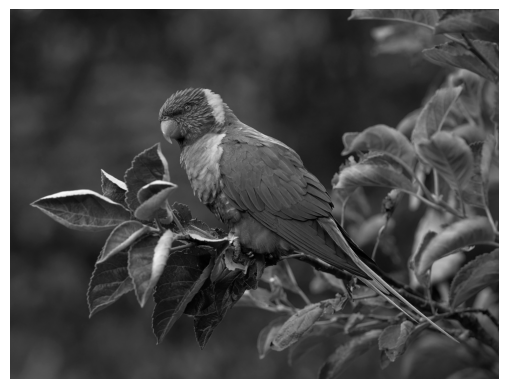

In [334]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [335]:
# Show dimensions
image.shape

(969, 1280)

In [336]:
# Show first pixel
image[0,0]


np.uint8(50)

In [341]:
# Load image in color
image_bgr = cv2.imread("/content/bird.jpg", cv2.IMREAD_COLOR)
# Show pixel
image_bgr[0,0]

array([52, 51, 47], dtype=uint8)

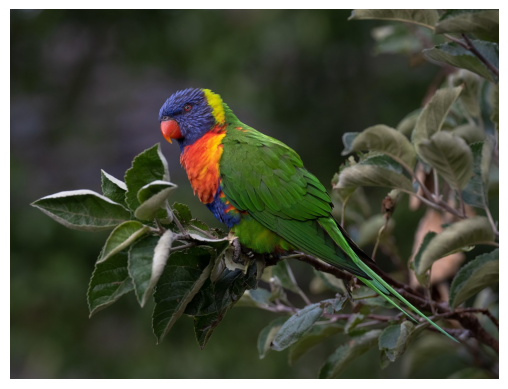

In [342]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [ ]:
"""
Saving an image:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Save image
cv2.imwrite("bird.jpg", image)
"""

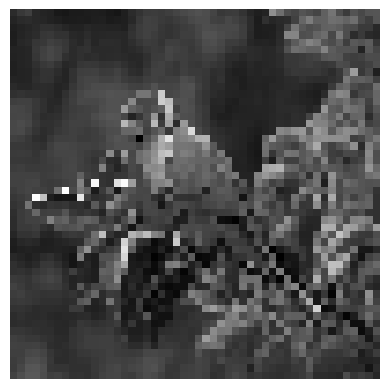

In [343]:
# Resizing an Image
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

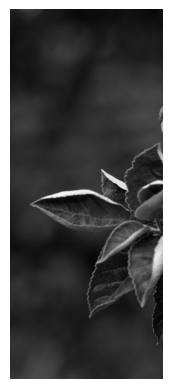

In [352]:
# Cropping
# Load image in grayscale
image = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Select first half of the columns and all rows
image_cropped = image[:,:400]
# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

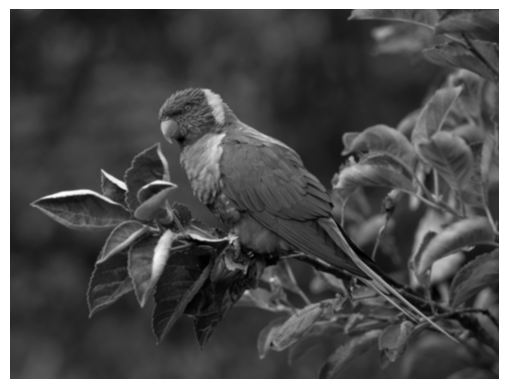

In [353]:
# Blurring Images
# Load image as grayscale
image = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Blur image
image_blurry = cv2.blur(image, (5,5))
# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

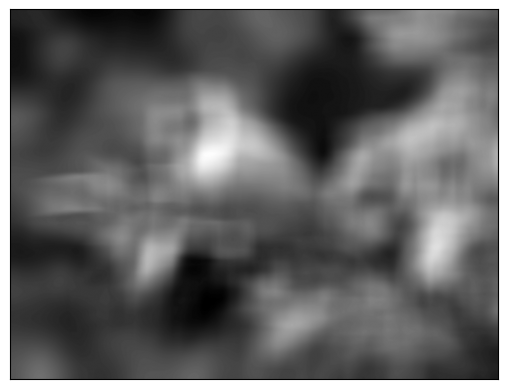

In [354]:
# To highlight the effect of kernel size, here is the same blurring with a 100 × 100 kernel:
# Blur image
image_very_blurry = cv2.blur(image, (100,100))
# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

In [355]:
# Create kernel
kernel = np.ones((5,5)) / 25.0
# Show kernel
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

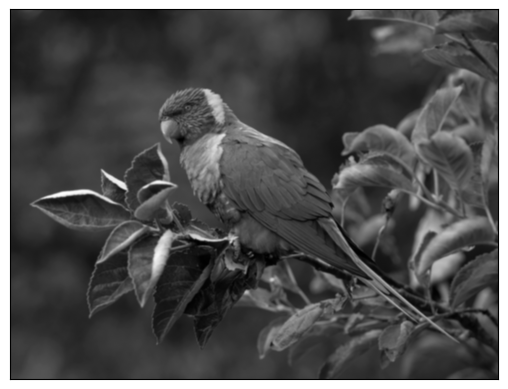

In [356]:
# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

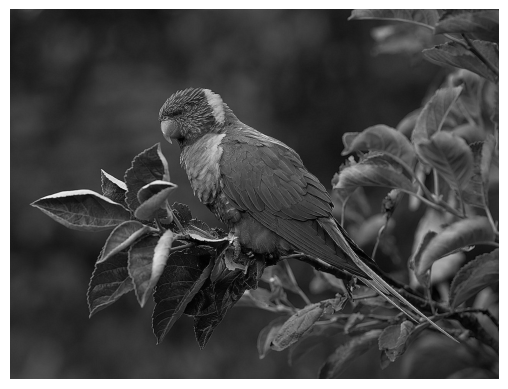

In [357]:
# Sharpening Images
# Load image as grayscale
image = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Create kernel
kernel = np.array([[0, -1, 0],
[-1, 5,-1],
[0, -1, 0]])
# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

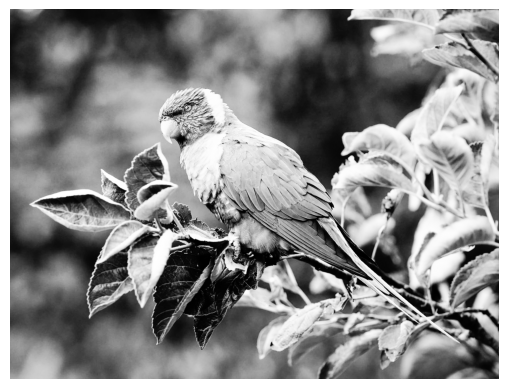

In [359]:
# Ennancing contrast
# Load image
image = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Enhance image
image_enhanced = cv2.equalizeHist(image)
# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

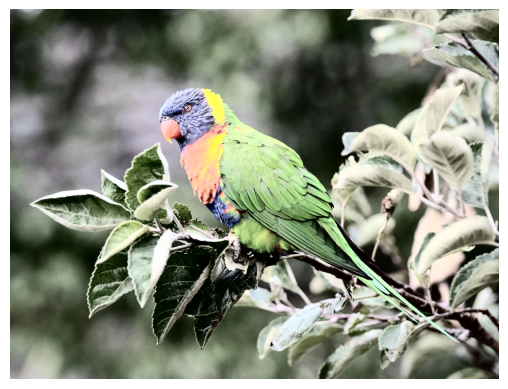

In [360]:
# Load image
image_bgr = cv2.imread("/content/bird.jpg")
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

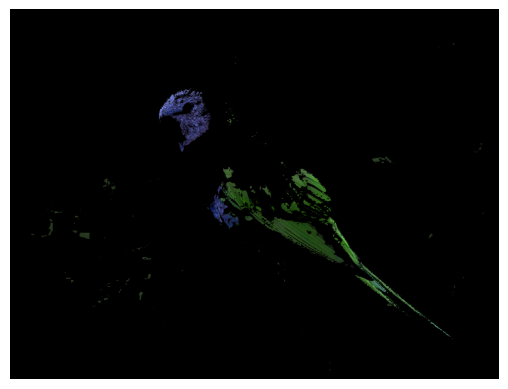

In [361]:
# Isolating colors
# Load image
image_bgr = cv2.imread('/content/bird.jpg')
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])
# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

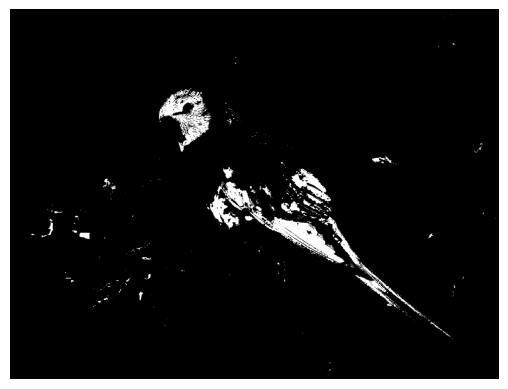

In [362]:
# Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

Thresholding is the process of setting pixels with intensity greater than some value
to be white and less than the value to be black.

A more advanced technique is
adaptive thresholding, where the threshold value for a pixel is determined by the pixel
intensities of its neighbors. This can be helpful when lighting conditions change over
different regions in an image:

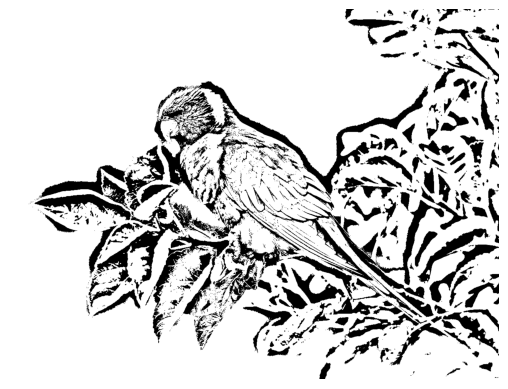

In [364]:
# Binarizing Images
# Load image as grayscale
image_grey = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
max_output_value,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

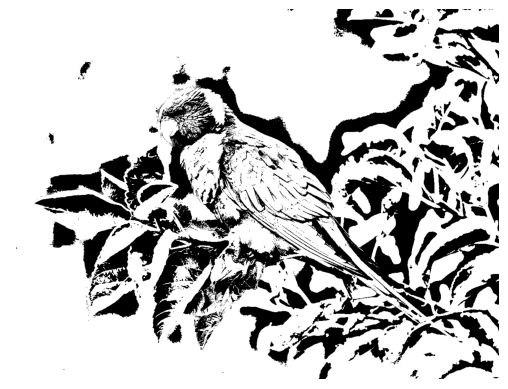

In [365]:
# Apply cv2.ADAPTIVE_THRESH_MEAN_C
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
max_output_value,
cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

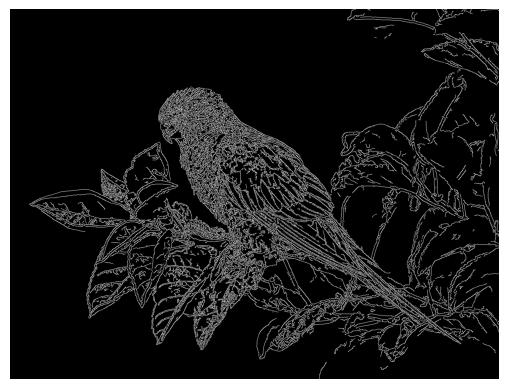

In [367]:
# Detecting Edges
# Load image as grayscale
image_gray = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Calculate median intensity
median_intensity = np.median(image_gray)
# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# Apply Canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

## Creating Features for Machine Learning

In [368]:
# Load image as grayscale
image = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))
# Convert image data to one-dimensional vector
image_10x10.flatten()

array([ 34,  34,  32,  53,  48,  65,  40,  59,  84,  51,  34,  35,  45,
        35,  47,  48,  36,  48,  48,  52,  56,  46,  65,  62,  70,  34,
        33,  36,  72,  84,  48,  55,  58,   1, 106,  45,  28,  74, 126,
        61,  57,  60,  45,  58,  80,  83,  31,  67,  43,  73,  58,  73,
        32,  41,  67,  49,  23,  49,  61,  69,  30,  29,  41,  26,  35,
        17,  56,  38, 105,  22,  46,  44,  62,  23,  13,  78,  57,  94,
        71,  71,  40,  35,  45,  26,  41,  64,  83,  62,  81,  15,  68,
        39,  53,  60,  49,  50,  52,  46,  46,  30], dtype=uint8)

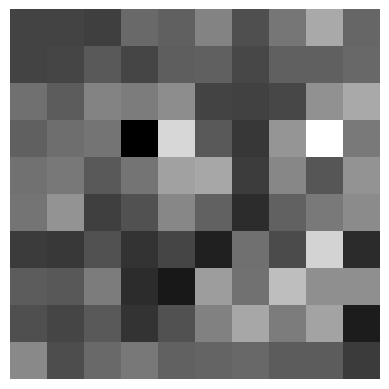

In [369]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In [370]:
image_10x10.shape

(10, 10)

In [371]:
image_10x10.flatten().shape

(100,)

In [372]:
# Load image in color
image_color = cv2.imread("/content/bird.jpg", cv2.IMREAD_COLOR)
# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))
# Convert image data to one-dimensional vector, show dimensions
image_color_10x10.flatten().shape

(300,)

In [374]:
# Load image in grayscale
image_256x256_gray = cv2.imread("/content/bird.jpg", cv2.IMREAD_GRAYSCALE)
# Convert image data to one-dimensional vector, show dimensions
image_256x256_gray.flatten().shape


(1240320,)

In [375]:
# Load image in color
image_256x256_color = cv2.imread("/content/bird.jpg", cv2.IMREAD_COLOR)
# Convert image data to one-dimensional vector, show dimensions
image_256x256_color.flatten().shape

(3720960,)

In [377]:
# Encoding color histograms as features
# Load image
image_bgr = cv2.imread("/content/bird.jpg", cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Create a list for feature values
features = []
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
  histogram = cv2.calcHist([image_rgb], # Image
  [i], # Index of channel
  None, # No mask
  [256], # Histogram size
  [0,256]) # Range
features.extend(histogram)
# Create a vector for an observation's feature values
observation = np.array(features).flatten()
# Show the observation's value for the first five features
observation[0:5]

array([12865.,  4379.,  5097.,  5462.,  5911.], dtype=float32)

In [378]:
# Show RGB channel values
image_rgb[0,0]

array([47, 51, 52], dtype=uint8)

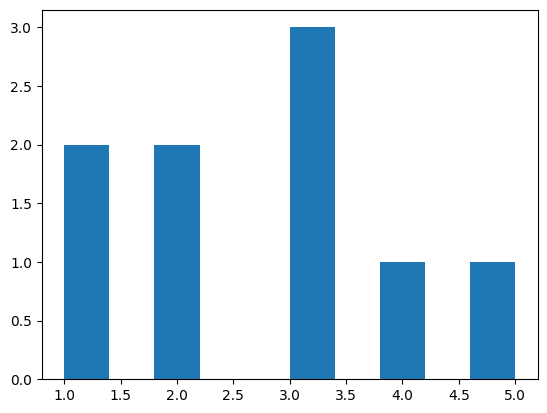

In [379]:
# Create some data
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])
# Show the histogram
data.hist(grid=False)
plt.show()

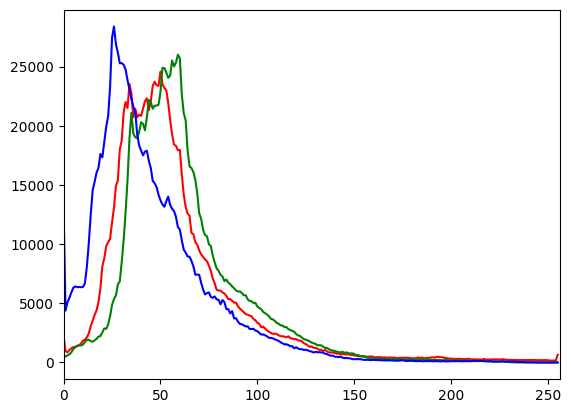

In [382]:
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
  histogram = cv2.calcHist([image_rgb], # Image
  [i], # Index of channel
  None, # No mask
  [256], # Histogram size
  [0,256]) # Range
  plt.plot(histogram, color = channel)
  plt.xlim([0,256])
# Show plot
plt.show()